In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import random
import warnings 
import pickle
warnings.simplefilter("ignore")

In [31]:
df=pd.read_csv('genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [32]:
df2=pd.read_csv('audio_features.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056,audio_features,6GsAD8PgHxmEuIPTG8GP3M,spotify:track:6GsAD8PgHxmEuIPTG8GP3M,https://api.spotify.com/v1/tracks/6GsAD8PgHxmE...,https://api.spotify.com/v1/audio-analysis/6GsA...,186080,4
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006,audio_features,6Knv6wdA0luoMUuuoYi2i1,spotify:track:6Knv6wdA0luoMUuuoYi2i1,https://api.spotify.com/v1/tracks/6Knv6wdA0luo...,https://api.spotify.com/v1/audio-analysis/6Knv...,192191,4
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,audio_features,0i5el041vd6nxrGEU8QRxy,spotify:track:0i5el041vd6nxrGEU8QRxy,https://api.spotify.com/v1/tracks/0i5el041vd6n...,https://api.spotify.com/v1/audio-analysis/0i5e...,208960,4


In [33]:
df2=df2.drop(['type','id','uri','track_href','analysis_url'],axis=1)


In [34]:

tempX=df2.iloc[:,:11]
tempX.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000


In [35]:
data=df.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [36]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [37]:
# tsne = TSNE(n_components=2)
# x_tsne = tsne.fit_transform(x, y)
# plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=np.unique(y))
# handles, labels = plot_tsne.legend_elements()
# lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
# plt.xlabel("T-SNE 1")
# plt.ylabel("T-SNE 2")
# _ = plt.title("T-SNE")

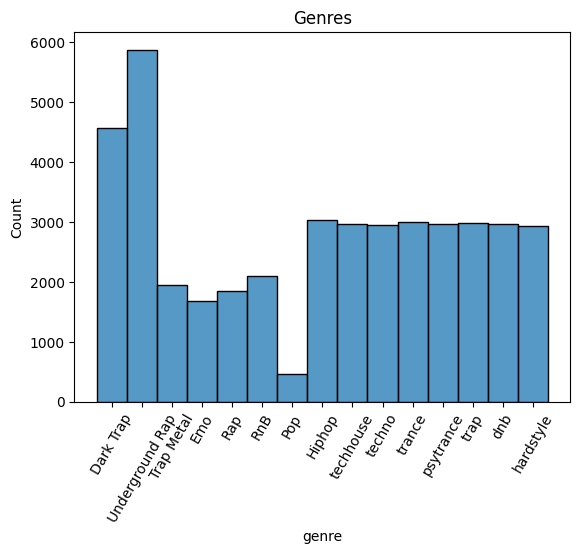

In [38]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

In [39]:
dataCopy=data.copy()
data = data.replace("Trap Metal", "Rap")
data = data.replace("Underground Rap", "Rap")
data = data.replace("Emo", "Rap")
data = data.replace("RnB", "Rap")
data = data.replace("Hiphop", "Rap")
data = data.replace("Dark Trap", "Rap")
data = data.replace("Pop", "Rap")

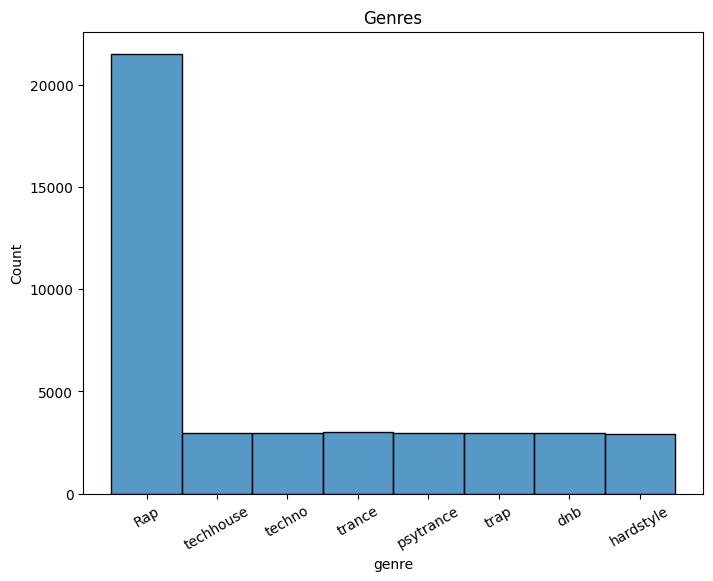

In [40]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=30)
_ = plt.title('Genres')

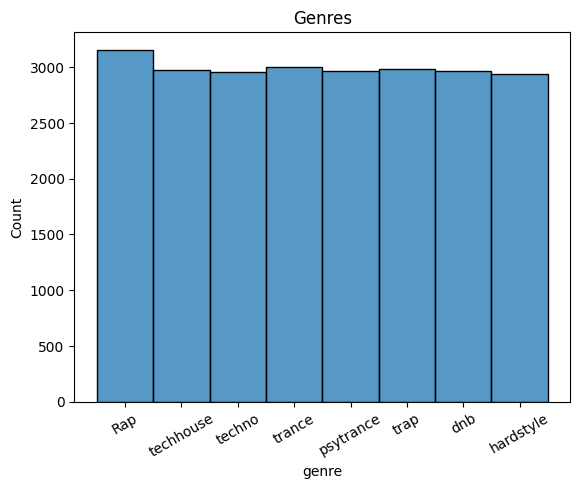

In [41]:
rows_drop = [] 

for i in range(len(data)): 
  if data.iloc[i]['genre'] == 'Rap': 
    if random.random()<0.85: 
      rows_drop.append(i) 
data.drop(index = rows_drop, inplace=True) 

ax = sns.histplot(data["genre"]) 
_ = plt.xticks(rotation=30) 
_ = plt.title("Genres")

In [42]:
x = data.loc[:,:"tempo"]
y = data["genre"]

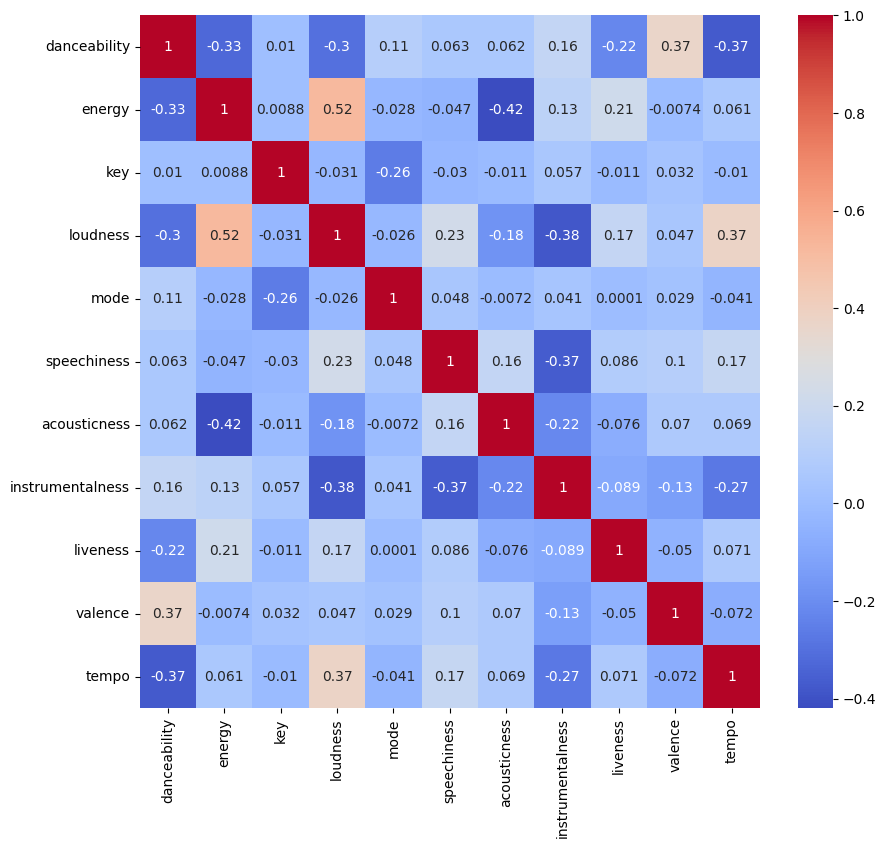

In [43]:
plt.subplots(figsize=(10,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

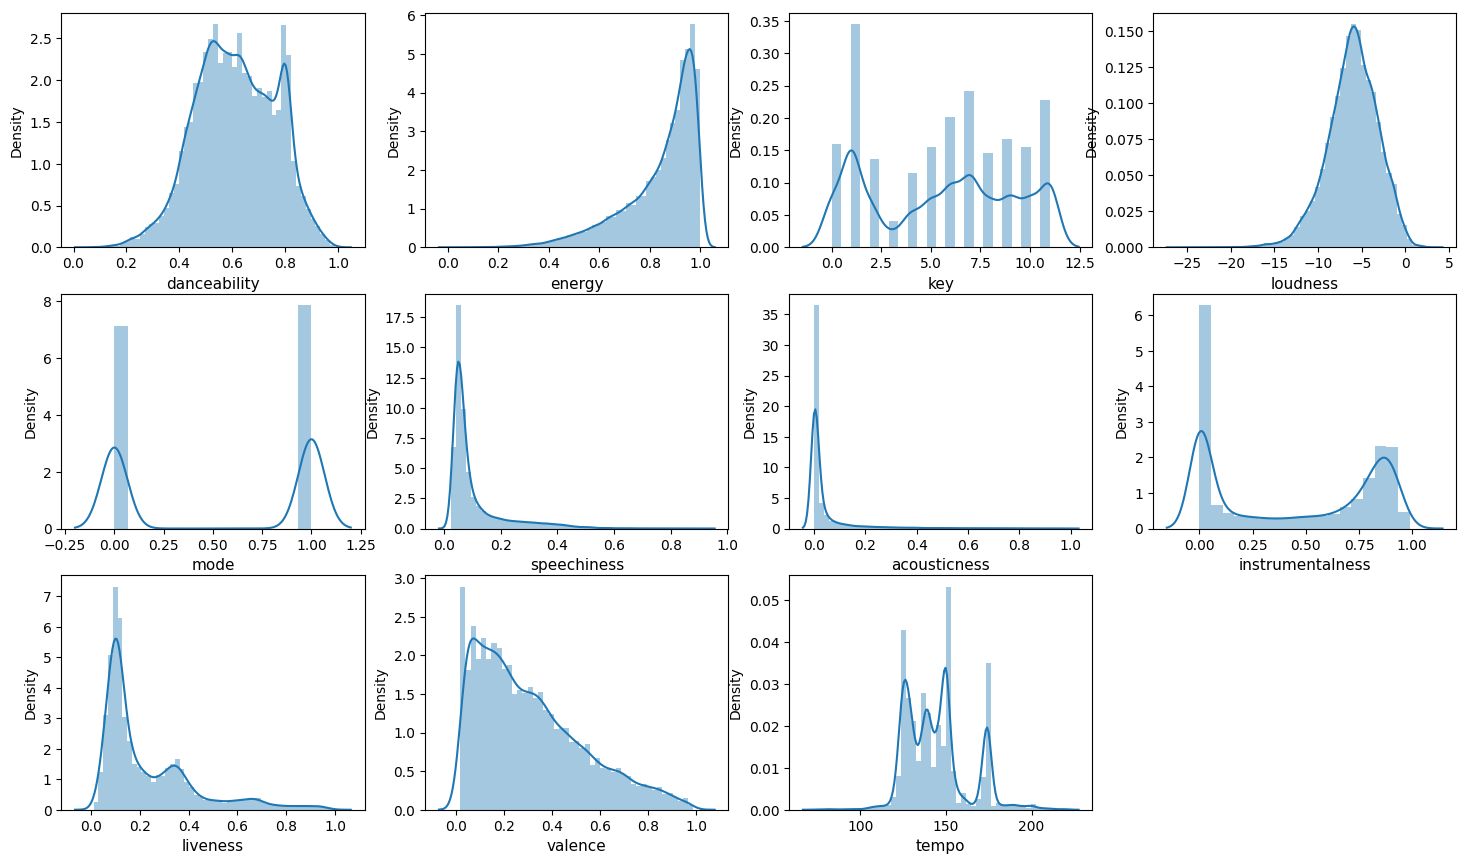

In [44]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42,shuffle=True ,stratify=y)

In [46]:
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [47]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [73]:
pickle.dump(scalerx,open('models/scaler.pkl','wb'))
pickle.dump(le,open('models/encoder.pkl','wb'))

In [49]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(xtrain,ytrain)
  return grid

def report(model, xtest, ytest):
  print(model.best_params_)
  preds=model.predict(xtest)
  ytest=le.inverse_transform(ytest)
  preds=le.inverse_transform(preds)
  cm=metrics.confusion_matrix(ytest,preds)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(ytest,preds))
  print('training accuracy:',model.best_score_)
  print('testing accuracy:',metrics.accuracy_score(ytest,preds))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{}


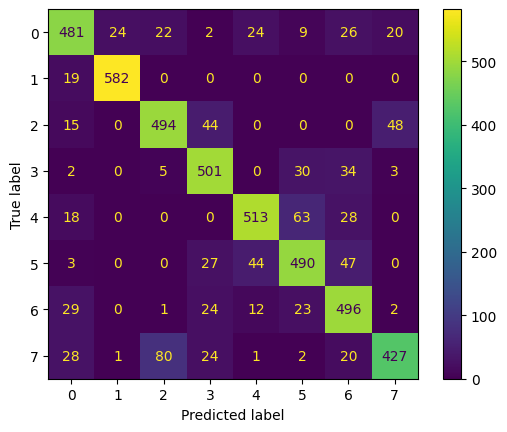

              precision    recall  f1-score   support

         Rap       0.81      0.79      0.80       608
         dnb       0.96      0.97      0.96       601
   hardstyle       0.82      0.82      0.82       601
   psytrance       0.81      0.87      0.84       575
   techhouse       0.86      0.82      0.84       622
      techno       0.79      0.80      0.80       611
      trance       0.76      0.84      0.80       587
        trap       0.85      0.73      0.79       583

    accuracy                           0.83      4788
   macro avg       0.83      0.83      0.83      4788
weighted avg       0.83      0.83      0.83      4788

training accuracy: 0.8235939213535955
testing accuracy: 0.8320802005012531


In [50]:

from sklearn.svm import SVC

svc=train_model(SVC(random_state=0),{})
report(svc,xtest,ytest)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'n_neighbors': 5}


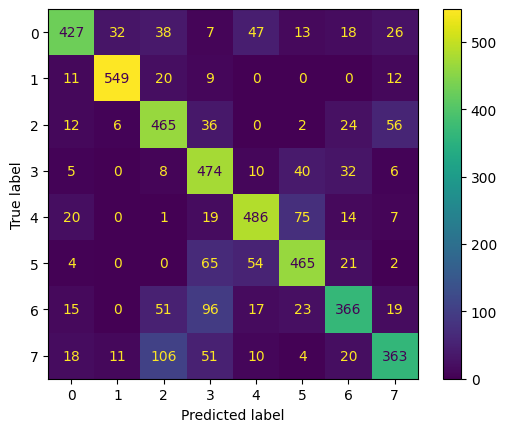

              precision    recall  f1-score   support

         Rap       0.83      0.70      0.76       608
         dnb       0.92      0.91      0.92       601
   hardstyle       0.67      0.77      0.72       601
   psytrance       0.63      0.82      0.71       575
   techhouse       0.78      0.78      0.78       622
      techno       0.75      0.76      0.75       611
      trance       0.74      0.62      0.68       587
        trap       0.74      0.62      0.68       583

    accuracy                           0.75      4788
   macro avg       0.76      0.75      0.75      4788
weighted avg       0.76      0.75      0.75      4788

training accuracy: 0.7304297874562641
testing accuracy: 0.7508354218880535


In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7]})
report(knn,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


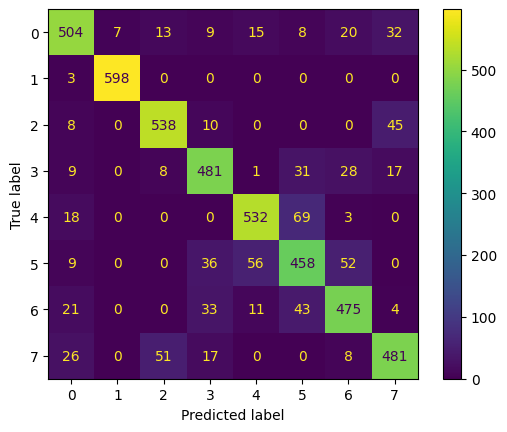

              precision    recall  f1-score   support

         Rap       0.84      0.83      0.84       608
         dnb       0.99      1.00      0.99       601
   hardstyle       0.88      0.90      0.89       601
   psytrance       0.82      0.84      0.83       575
   techhouse       0.87      0.86      0.86       622
      techno       0.75      0.75      0.75       611
      trance       0.81      0.81      0.81       587
        trap       0.83      0.83      0.83       583

    accuracy                           0.85      4788
   macro avg       0.85      0.85      0.85      4788
weighted avg       0.85      0.85      0.85      4788

training accuracy: 0.831949449057392
testing accuracy: 0.8494152046783626


In [52]:
from sklearn.tree import  DecisionTreeClassifier

dt=train_model(DecisionTreeClassifier(random_state=42),{})
report(dt,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


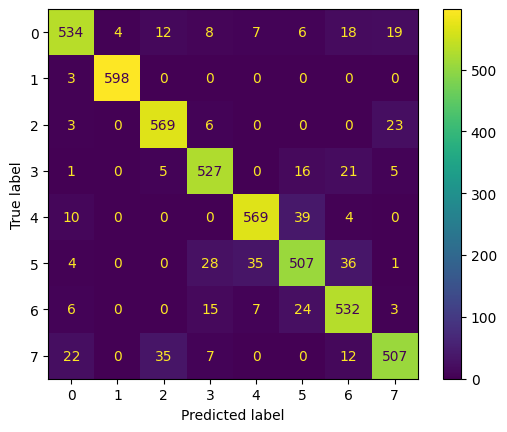

              precision    recall  f1-score   support

         Rap       0.92      0.88      0.90       608
         dnb       0.99      1.00      0.99       601
   hardstyle       0.92      0.95      0.93       601
   psytrance       0.89      0.92      0.90       575
   techhouse       0.92      0.91      0.92       622
      techno       0.86      0.83      0.84       611
      trance       0.85      0.91      0.88       587
        trap       0.91      0.87      0.89       583

    accuracy                           0.91      4788
   macro avg       0.91      0.91      0.91      4788
weighted avg       0.91      0.91      0.91      4788

training accuracy: 0.890594809128414
testing accuracy: 0.9070593149540518


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf=train_model(RandomForestClassifier(random_state=42),{})
report(rf,xtest,ytest)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
{'learning_rate': 0.2, 'max_depth': 14}


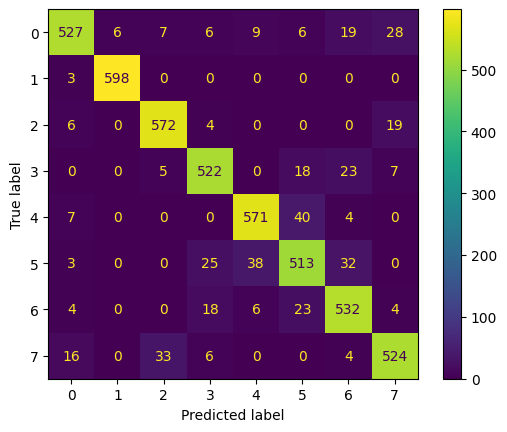

              precision    recall  f1-score   support

         Rap       0.93      0.87      0.90       608
         dnb       0.99      1.00      0.99       601
   hardstyle       0.93      0.95      0.94       601
   psytrance       0.90      0.91      0.90       575
   techhouse       0.92      0.92      0.92       622
      techno       0.85      0.84      0.85       611
      trance       0.87      0.91      0.89       587
        trap       0.90      0.90      0.90       583

    accuracy                           0.91      4788
   macro avg       0.91      0.91      0.91      4788
weighted avg       0.91      0.91      0.91      4788

training accuracy: 0.8973314533396
testing accuracy: 0.9104010025062657


In [54]:
from xgboost import XGBClassifier


xgb=train_model(
    XGBClassifier(booster='gbtree',eval_metric='merror',seed=42,objective='multi:softprob'),
    {
        'max_depth':list(range(5,20)),
        # 'objective':['mutli:softprob','multi:softmax'],
        # 'n_estimators':list(range(50,100,10)),
        'learning_rate':[0.05,0.2,0.5,0.7,1]
    } 
)
report(xgb,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


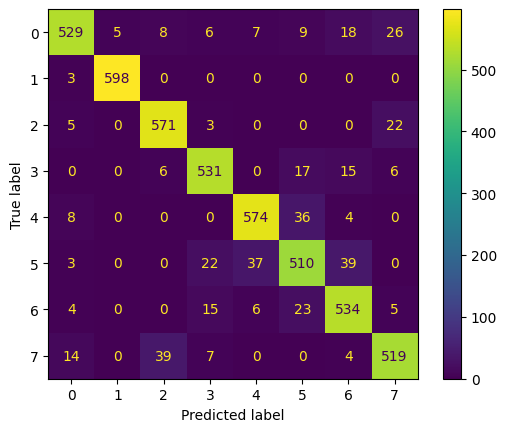

              precision    recall  f1-score   support

         Rap       0.93      0.87      0.90       608
         dnb       0.99      1.00      0.99       601
   hardstyle       0.92      0.95      0.93       601
   psytrance       0.91      0.92      0.92       575
   techhouse       0.92      0.92      0.92       622
      techno       0.86      0.83      0.85       611
      trance       0.87      0.91      0.89       587
        trap       0.90      0.89      0.89       583

    accuracy                           0.91      4788
   macro avg       0.91      0.91      0.91      4788
weighted avg       0.91      0.91      0.91      4788

training accuracy: 0.897905895869236
testing accuracy: 0.9118629908103593


In [55]:
from lightgbm import LGBMClassifier

lgbm=train_model(LGBMClassifier(verbose=0, seed=42, objective='multiclass'),{})
report(lgbm,xtest,ytest)

In [56]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 20, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 20, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                      

In [57]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 500,
                verbose = 1, batch_size = 24,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/500


798/798 [==============================] - 12s 10ms/step - loss: 0.8460 - accuracy: 0.6978 - val_loss: 0.5671 - val_accuracy: 0.7863
Epoch 2/500
798/798 [==============================] - 7s 9ms/step - loss: 0.6194 - accuracy: 0.7784 - val_loss: 0.4807 - val_accuracy: 0.8310
Epoch 3/500
798/798 [==============================] - 8s 11ms/step - loss: 0.5836 - accuracy: 0.7894 - val_loss: 0.4657 - val_accuracy: 0.8306
Epoch 4/500
798/798 [==============================] - 6s 7ms/step - loss: 0.5786 - accuracy: 0.7932 - val_loss: 0.4581 - val_accuracy: 0.8381
Epoch 5/500
798/798 [==============================] - 8s 10ms/step - loss: 0.5458 - accuracy: 0.8028 - val_loss: 0.4501 - val_accuracy: 0.8406
Epoch 6/500
798/798 [==============================] - 9s 11ms/step - loss: 0.5329 - accuracy: 0.8043 - val_loss: 0.4706 - val_accuracy: 0.8250
Epoch 7/500
798/798 [==============================] - 8s 10ms/step - loss: 0.5264 - accuracy: 0.8124 - val_loss: 0.4684 - val_accuracy

In [58]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))


599/599 [==============================] - 3s 5ms/step - loss: 0.2959 - accuracy: 0.8937
[0.2959132790565491, 0.8937281370162964]
150/150 [==============================] - 1s 7ms/step - loss: 0.3465 - accuracy: 0.8751
[0.34647244215011597, 0.8751044273376465]


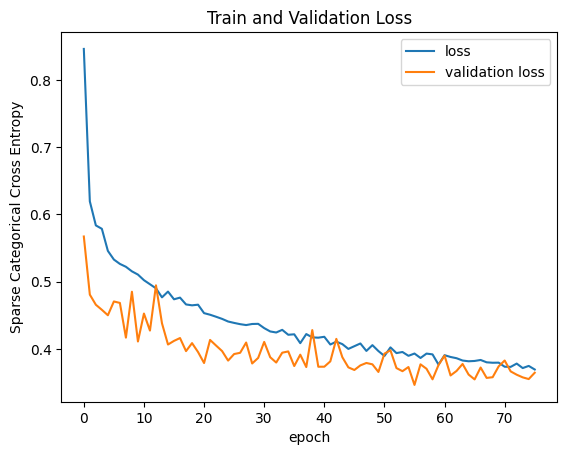

In [59]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

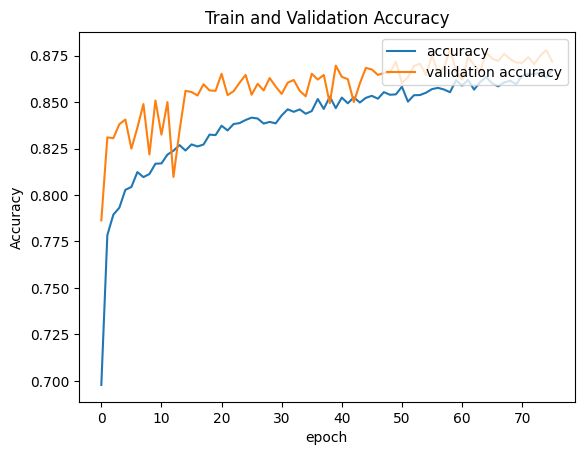

In [60]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [61]:
ypred = model.predict(xtest).argmax(axis=1)

150/150 [==============================] - 1s 2ms/step


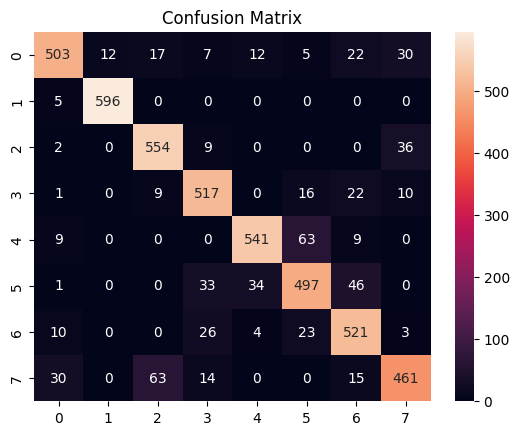

In [62]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [63]:
print(metrics.classification_report(le.inverse_transform(ytest), le.inverse_transform(ypred)))

              precision    recall  f1-score   support

         Rap       0.90      0.83      0.86       608
         dnb       0.98      0.99      0.99       601
   hardstyle       0.86      0.92      0.89       601
   psytrance       0.85      0.90      0.88       575
   techhouse       0.92      0.87      0.89       622
      techno       0.82      0.81      0.82       611
      trance       0.82      0.89      0.85       587
        trap       0.85      0.79      0.82       583

    accuracy                           0.88      4788
   macro avg       0.88      0.88      0.87      4788
weighted avg       0.88      0.88      0.87      4788



In [64]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       608
           1       0.98      0.99      0.99       601
           2       0.86      0.92      0.89       601
           3       0.85      0.90      0.88       575
           4       0.92      0.87      0.89       622
           5       0.82      0.81      0.82       611
           6       0.82      0.89      0.85       587
           7       0.85      0.79      0.82       583

    accuracy                           0.88      4788
   macro avg       0.88      0.88      0.87      4788
weighted avg       0.88      0.88      0.87      4788



In [65]:
newX=scalerx.transform(tempX)


In [66]:
xgbPreds=xgb.predict(newX)
xgbPreds

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [67]:
lgbmPreds=lgbm.predict(newX)
lgbmPreds

array([0, 0, 0, ..., 6, 0, 0])

In [68]:
modelPreds=model.predict(newX).argmax(axis=1)
modelPreds

1654/1654 [==============================] - 9s 5ms/step


array([0, 0, 1, ..., 6, 0, 4], dtype=int64)

In [69]:
df2['xgbPreds']=xgbPreds
df2['lgbmPreds']=lgbmPreds
df2['modelPreds']=modelPreds


In [72]:
pickle.dump(model,open('models/model.pkl','wb'))
pickle.dump(xgb,open('models/xgb.pkl','wb'))
pickle.dump(lgbm,open('models/lgbm.pkl','wb'))

In [71]:
df2.to_csv('new_audio_features.csv',index=False)

In [75]:
print(len(df2))
print(len(df2[df2['xgbPreds']==df2['lgbmPreds']]))
print(len(df2[df2['xgbPreds']==df2['modelPreds']])) 
print(len(df2[df2['lgbmPreds']==df2['modelPreds']]))
print(len(df2[df2['xgbPreds']==df2['lgbmPreds']][df2['lgbmPreds']==df2['modelPreds']]))

52915
50744
46833
46898
45910
